In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Hospital visits by state

In [3]:
er_hospital_states = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Jurisdiction Counts & Rates')
er_hospital_states

,jurisdiction,month,year,time_frame,dataset,count_alldrug,count_opioid,count_fentanyl,count_heroin,count_stimulant,...,count_benzodiazepine,population,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,AK,all,2018,annual,ED,792,230,NaN,135,48,...,44,736624,107.5,31.2,NaN,18.3,6.5,suppressed,NaN,6
1,AK,all,2018,annual,HOSP,335,107,NaN,27,53,...,26,736624,45.5,14.5,NaN,3.7,7.2,suppressed,NaN,3.5
2,AK,all,2019,annual,ED,768,249,NaN,126,44,...,27,733603,104.7,33.9,NaN,17.2,6,suppressed,NaN,3.7
3,AK,all,2019,annual,HOSP,346,112,NaN,25,70,...,22,733603,47.2,15.3,NaN,3.4,9.5,suppressed,NaN,3
4,AK,all,2020,annual,ED,814,320,NaN,131,50,...,28,732964,111.1,43.7,NaN,17.9,6.8,suppressed,NaN,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,WI,12,2021,monthly,HOSP,153,70,11,19,27,...,14,5879978,2.6,1.2,suppressed,suppressed,0.5,suppressed,NaN,suppressed
5105,WI,12,2022,monthly,ED,562,227,13,95,20,...,37,5890543,9.5,3.9,suppressed,1.6,0.3,suppressed,suppressed,0.6
5106,WI,12,2022,monthly,HOSP,158,59,16,17,27,...,11,5890543,2.7,1,suppressed,suppressed,0.5,0.4,suppressed,suppressed
5107,WI,12,2023,monthly,ED,481,147,16,36,26,...,10,5910955,8.1,2.5,suppressed,0.6,0.4,suppressed,suppressed,suppressed


In [165]:
er_hospital_states.to_csv('states.csv')



In [4]:
er_hospital_states['count_fentanyl'] = pd.to_numeric(er_hospital_states['count_fentanyl'], errors = 'coerce')
er_hospital_states['count_cocaine'] = pd.to_numeric(er_hospital_states['count_cocaine'], errors = 'coerce')
er_hospital_states['population'] = pd.to_numeric(er_hospital_states['population'], errors = 'coerce')

In [5]:
color_palette = {
    'black': '#000000',
    'rusty red': '#af2f0d',
    
    
}
colors = list(color_palette.values())
sns.set_palette(colors)



In [6]:
er_hospital_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jurisdiction           5109 non-null   object 
 1   month                  5109 non-null   object 
 2   year                   5109 non-null   int64  
 3   time_frame             5109 non-null   object 
 4   dataset                5109 non-null   object 
 5   count_alldrug          5109 non-null   int64  
 6   count_opioid           5109 non-null   object 
 7   count_fentanyl         2105 non-null   float64
 8   count_heroin           5109 non-null   object 
 9   count_stimulant        5109 non-null   object 
 10  count_cocaine          3445 non-null   float64
 11  count_methamphetamine  1056 non-null   object 
 12  count_benzodiazepine   5109 non-null   object 
 13  population             5109 non-null   int64  
 14  rate_alldrug           5109 non-null   object 
 15  rate

# How many annual inpatient hospitalizations vs emergency room? 

## Count ODs of per state from 2018 - 2023

### Emergency Dept nonfatal ODs 

In [10]:
yearly2018_2023ed = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
yearly2018_2023ed

,jurisdiction,count_fentanyl,count_cocaine
0,AK,270.0,0.0
1,AZ,4800.0,482.0
2,CA,20393.0,4976.0
3,CO,2850.0,472.0
4,DC,66.0,114.0
5,FL,10026.0,5273.0
6,GA,1964.0,1449.0
7,HI,14.0,46.0
8,IA,161.0,109.0
9,IL,1125.0,1881.0


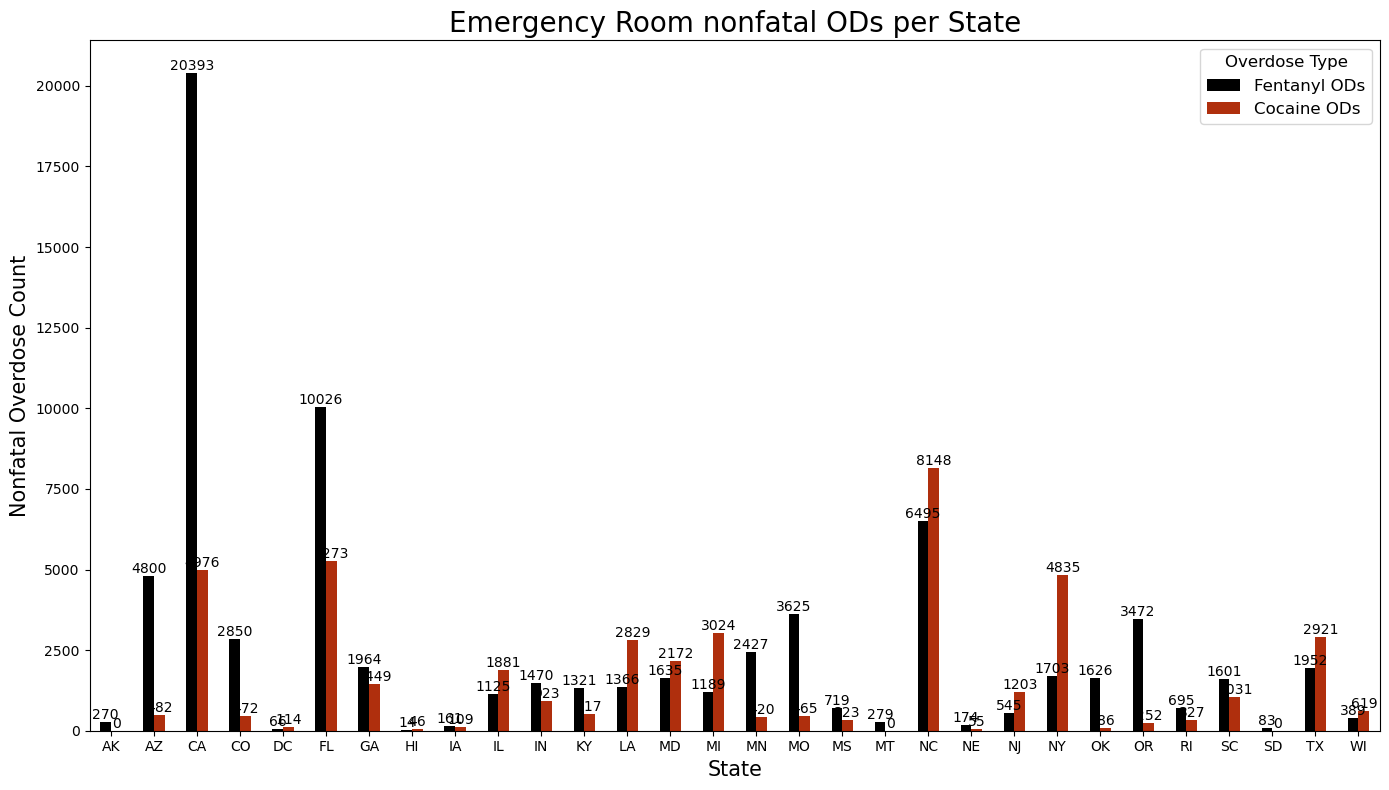

In [11]:

ax= yearly2018_2023ed.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Emergency Room nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

#plt.ylim(bottom=0, top=36000)

### Inpatient Hospitalizations nonfatal ODs 

In [13]:
yearly2018_2023hosp = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
    
)
yearly2018_2023hosp


,jurisdiction,count_fentanyl,count_cocaine
0,AK,99.0,81.0
1,AZ,2376.0,876.0
2,CA,7477.0,7897.0
3,CO,747.0,912.0
4,DC,65.0,736.0
5,DE,357.0,591.0
6,FL,4386.0,14312.0
7,GA,1140.0,5752.0
8,HI,11.0,112.0
9,IA,45.0,136.0


(0.0, 20000.0)

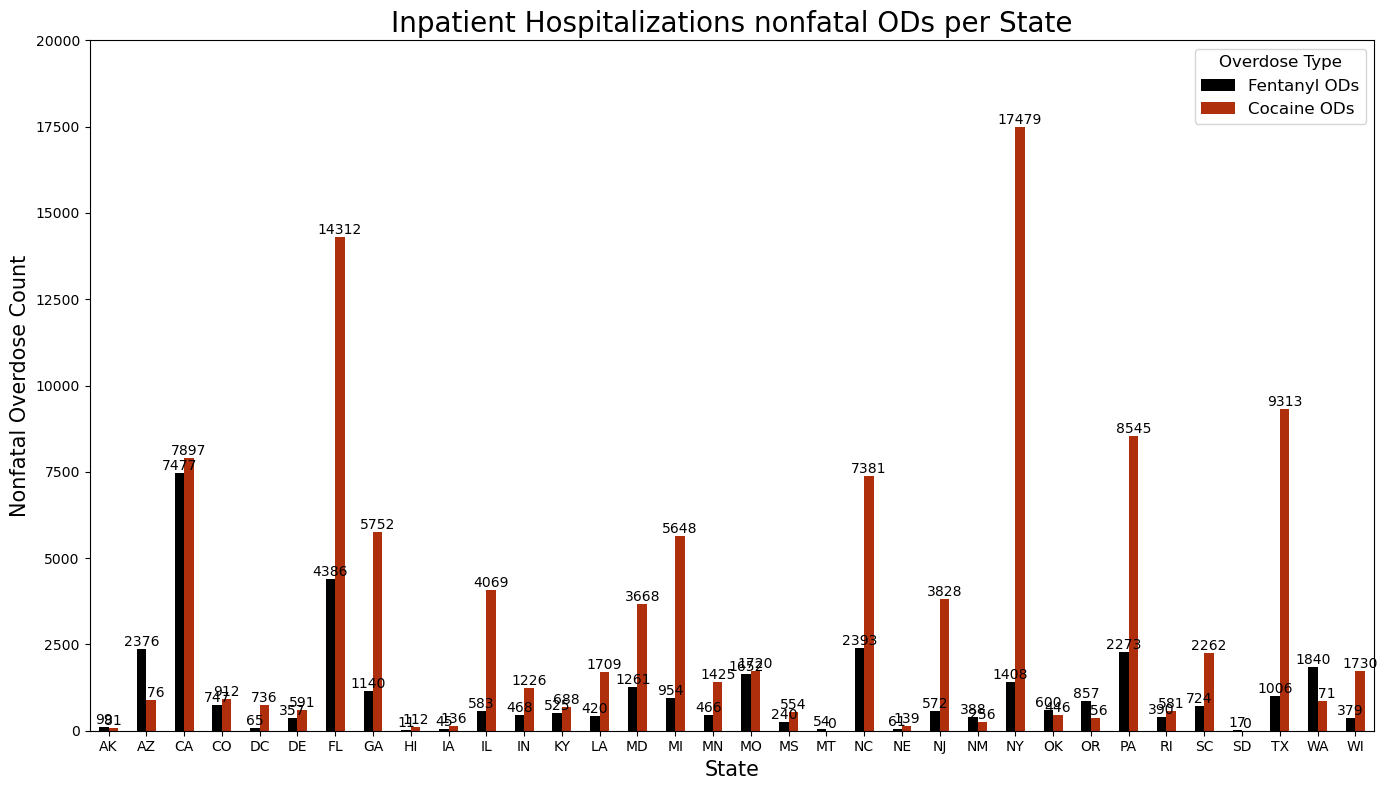

In [14]:

ax= yearly2018_2023hosp.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Inpatient Hospitalizations nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

plt.ylim(bottom=0, top=20000)

# Comparing Emergency Dept Vs Hospitalizations

## Cocaine OD Visits

In [17]:
cocaine_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_cocaine'].sum().reset_index()
    
)
cocaine_visits_count


,jurisdiction,dataset,count_cocaine
0,AK,ED,0.0
1,AK,HOSP,81.0
2,AZ,ED,621.0
3,AZ,HOSP,1610.0
4,CA,ED,9952.0
...,...,...,...
59,TX,ED,5842.0
60,TX,HOSP,18626.0
61,WA,HOSP,1505.0
62,WI,ED,980.0


In [18]:
cocaine_ervisits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby(['jurisdiction','dataset'])['count_cocaine'].sum().reset_index()
    .sort_values(by='count_cocaine',ascending= False)
    .head(5)
    
)
cocaine_ervisits_count


,jurisdiction,dataset,count_cocaine
19,NC,ED,16296.0
5,FL,ED,10546.0
2,CA,ED,9952.0
22,NY,ED,9670.0
14,MI,ED,6048.0


In [19]:
sorted_jurisdictions1 = (
    cocaine_ervisits_count
    .groupby('jurisdiction')['count_cocaine']
    .sum()
    .sort_values(ascending=False)
    .index
    
)

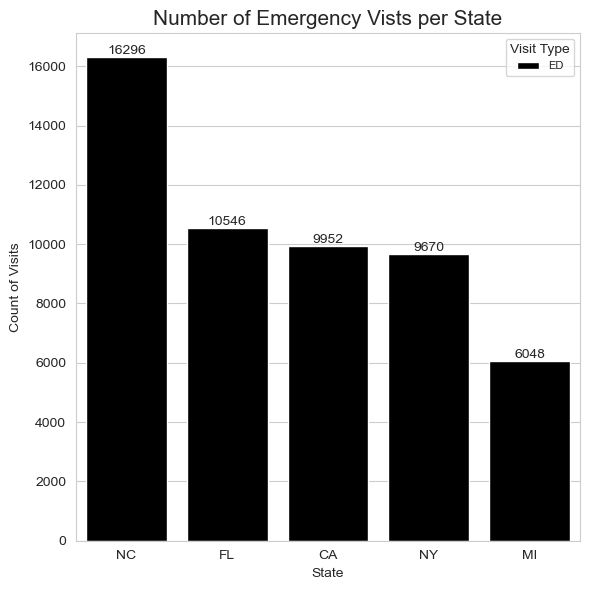

In [20]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(
    x='jurisdiction',
    y='count_cocaine',
    hue='dataset',
    data=cocaine_ervisits_count,
    order=sorted_jurisdictions1,
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Visits', fontsize=10)
plt.title('Number of Emergency Vists per State', fontsize=15)
plt.legend( title='Visit Type', title_fontsize=10, fontsize=8)
plt.tight_layout()
plt.savefig('Cocaine er Vists per State.png')

In [21]:
cocaine_hospvisits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby(['jurisdiction','dataset'])['count_cocaine'].sum().reset_index()
    .sort_values(by='count_cocaine',ascending= False)
    .head(5)
    
)
cocaine_hospvisits_count


,jurisdiction,dataset,count_cocaine
24,NY,HOSP,34958.0
6,FL,HOSP,28624.0
31,TX,HOSP,18626.0
27,PA,HOSP,17090.0
2,CA,HOSP,15794.0


In [22]:
sorted_jurisdictions2 = (
    cocaine_hospvisits_count
    .groupby('jurisdiction')['count_cocaine']
    .sum()
    .sort_values(ascending=False)
    .index
    
)

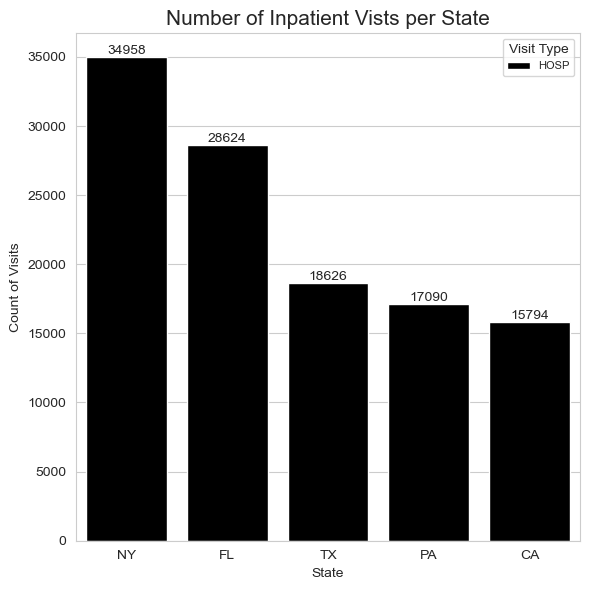

In [23]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(
    x='jurisdiction',
    y='count_cocaine',
    hue='dataset',
    data=cocaine_hospvisits_count,
    order=sorted_jurisdictions2
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Visits', fontsize=10)
plt.title('Number of Inpatient Vists per State', fontsize=15)
plt.legend( title='Visit Type', title_fontsize=10, fontsize=8)
plt.tight_layout()
plt.savefig('Cocaine hosp Vists per State.png')

In [24]:
cocaine_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_cocaine'].sum().reset_index()
    
)
cocaine_visits_count


,jurisdiction,dataset,count_cocaine
0,AK,ED,0.0
1,AK,HOSP,81.0
2,AZ,ED,621.0
3,AZ,HOSP,1610.0
4,CA,ED,9952.0
...,...,...,...
59,TX,ED,5842.0
60,TX,HOSP,18626.0
61,WA,HOSP,1505.0
62,WI,ED,980.0


In [25]:
sorted_jurisdictions = (
    cocaine_visits_count
    .groupby('jurisdiction')['count_cocaine']
    .sum()
    .sort_values(ascending=False)
    .index
    
)


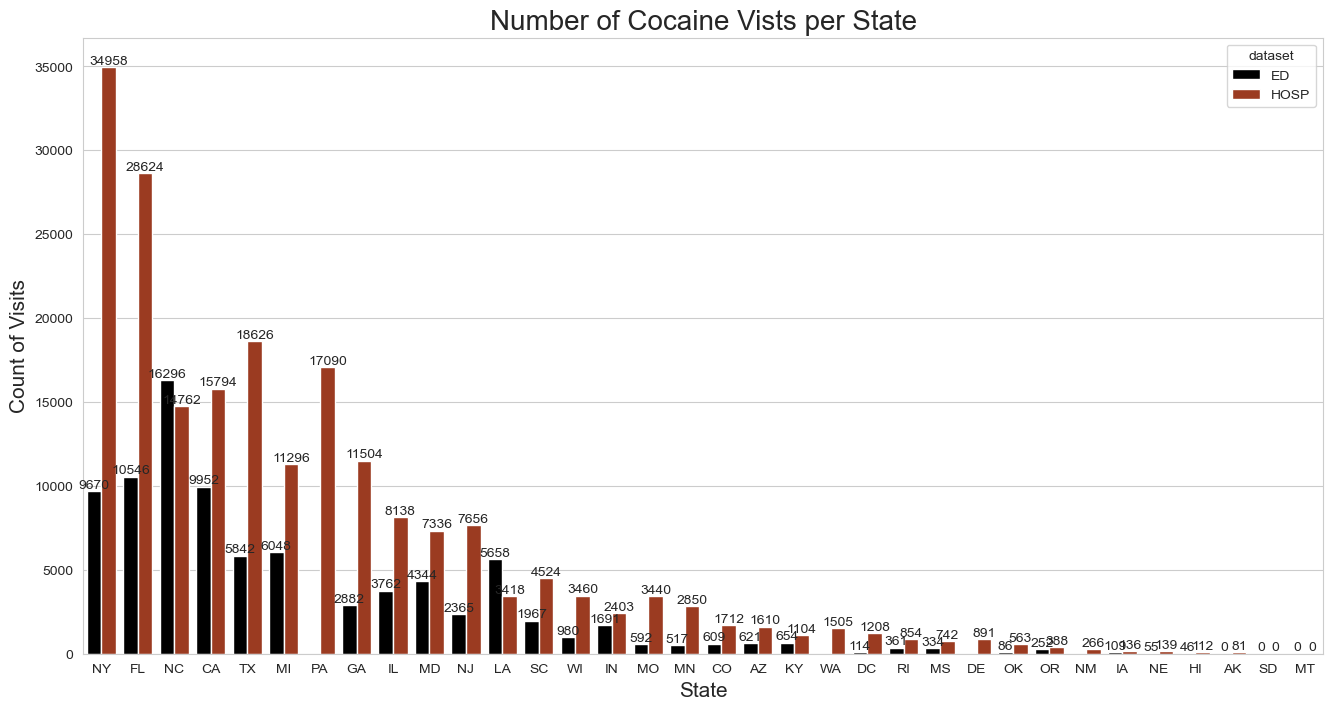

In [26]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='jurisdiction',
    y='count_cocaine',
    hue='dataset',
    data=cocaine_visits_count,
    order=sorted_jurisdictions
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count of Visits', fontsize=15)
plt.title('Number of Cocaine Vists per State', fontsize=20)

plt.savefig('Cocaine Vists per State.png')

## Fentanyl OD visits

In [28]:
fentanyl_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_fentanyl'].sum().reset_index()
    .sort_values(by='count_fentanyl', ascending=False)
)
fentanyl_visits_count.head(10)



,jurisdiction,dataset,count_fentanyl
4,CA,ED,41445.0
11,FL,ED,20567.0
5,CA,HOSP,15152.0
39,NC,ED,13238.0
2,AZ,ED,9842.0
12,FL,HOSP,8958.0
33,MO,ED,7476.0
50,OR,ED,6935.0
6,CO,ED,5764.0
31,MN,ED,5217.0


In [29]:
sorted_jurisdictions = (
    fentanyl_visits_count
    .groupby('jurisdiction')['count_fentanyl']
    .sum()
    .sort_values(ascending=False)
    .index
)

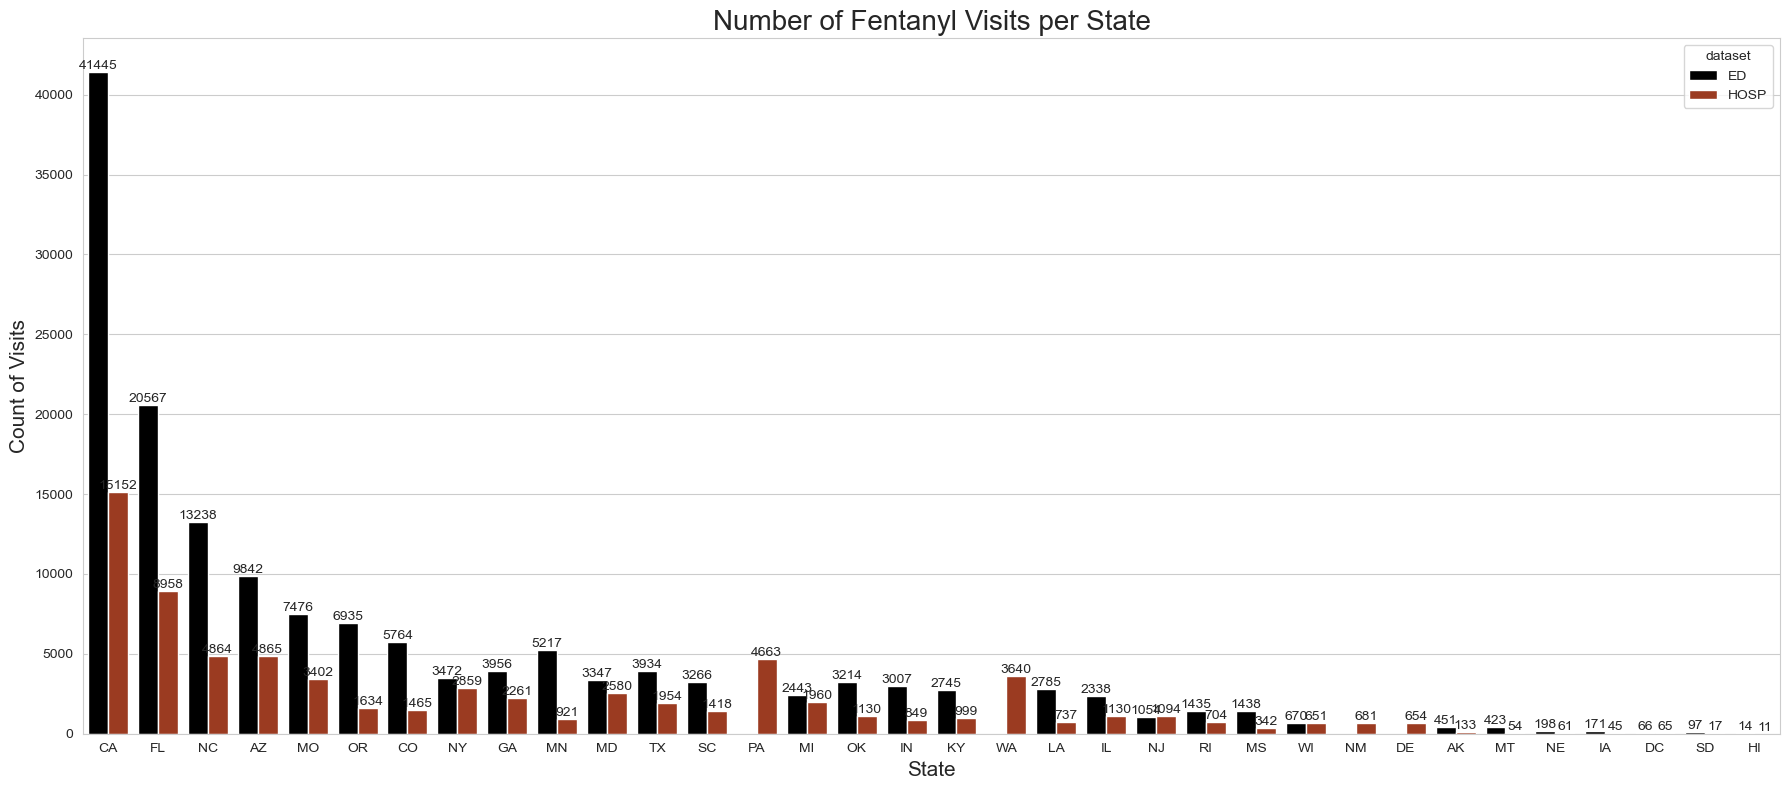

In [30]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(
    x='jurisdiction',
    y='count_fentanyl',
    hue='dataset',
    data=fentanyl_visits_count,
    order=sorted_jurisdictions
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count of Visits', fontsize=15)
plt.title('Number of Fentanyl Visits per State', fontsize=20)
plt.tight_layout()
plt.savefig('Fentanyl Vists per State.png')

In [31]:
fentanyl_hospvisits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby(['jurisdiction', 'dataset'])['count_fentanyl'].sum().reset_index()
    .sort_values(by='count_fentanyl', ascending=False)
    .head(5)
)
fentanyl_hospvisits_count



,jurisdiction,dataset,count_fentanyl
2,CA,HOSP,15152.0
6,FL,HOSP,8958.0
1,AZ,HOSP,4865.0
20,NC,HOSP,4864.0
27,PA,HOSP,4663.0


In [32]:
fentanyl_ervisits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby(['jurisdiction', 'dataset'])['count_fentanyl'].sum().reset_index()
    .sort_values(by='count_fentanyl', ascending=False)
    .head(5)
)
fentanyl_ervisits_count



,jurisdiction,dataset,count_fentanyl
2,CA,ED,41445.0
5,FL,ED,20567.0
19,NC,ED,13238.0
1,AZ,ED,9842.0
16,MO,ED,7476.0


In [33]:
sorted_jurisdictions1 = (
    fentanyl_hospvisits_count
    .groupby('jurisdiction')['count_fentanyl']
    .sum()
    .sort_values(ascending=False)
    .index
)

In [34]:
sorted_jurisdictions1 = (
    fentanyl_ervisits_count
    .groupby('jurisdiction')['count_fentanyl']
    .sum()
    .sort_values(ascending=False)
    .index
)

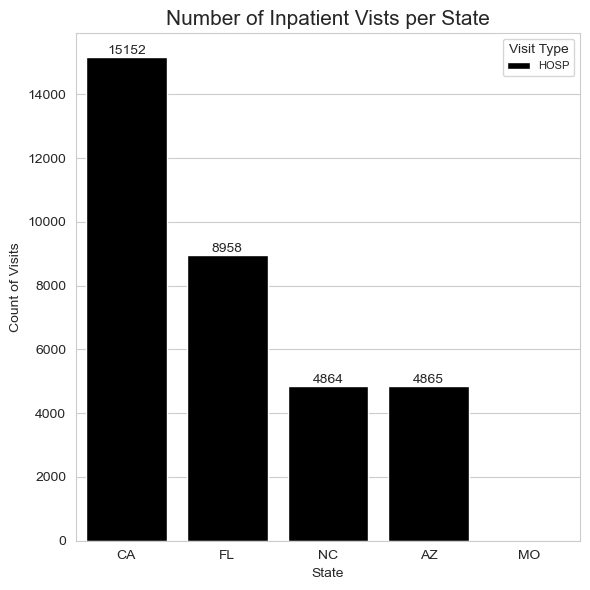

In [35]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(
    x='jurisdiction',
    y='count_fentanyl',
    hue='dataset',
    data=fentanyl_hospvisits_count,
    order=sorted_jurisdictions1
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Visits', fontsize=10)
plt.title('Number of Inpatient Vists per State', fontsize=15)
plt.legend( title='Visit Type', title_fontsize=10, fontsize=8)
plt.tight_layout()
plt.savefig('Fentanyl hosp Vists per State.png')

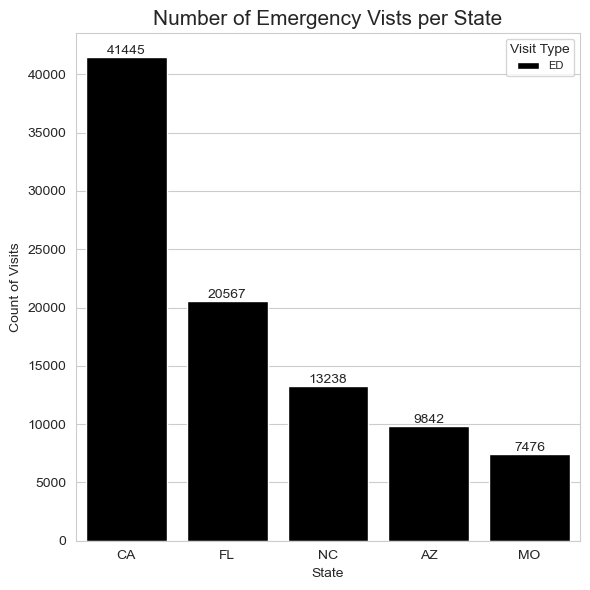

In [36]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(
    x='jurisdiction',
    y='count_fentanyl',
    hue='dataset',
    data=fentanyl_ervisits_count,
    order=sorted_jurisdictions1
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Visits', fontsize=10)
plt.title('Number of Emergency Vists per State', fontsize=15)
plt.legend( title='Visit Type', title_fontsize=10, fontsize=8)
plt.tight_layout()
plt.savefig('Fentanyl er Vists per State.png')

## Count of overdose by year

In [38]:
annual_HOSP_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_HOSP_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,17258.0
1,2019,0.0,17978.0
2,2020,0.0,16596.0
3,2021,7406.0,17402.0
4,2022,10950.0,17316.0
5,2023,17878.0,18749.0


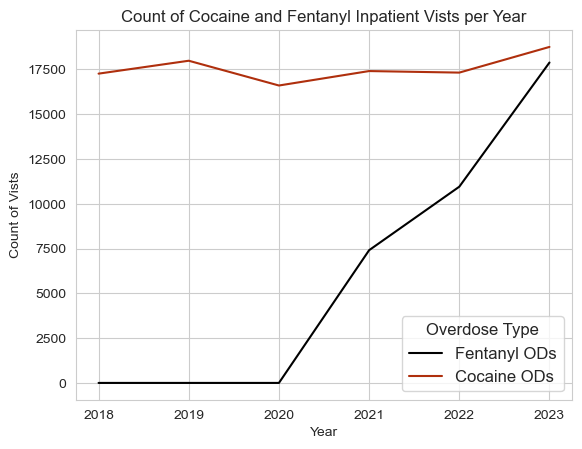

In [39]:
#set x-axis
annual_HOSP_visits= annual_HOSP_visits.set_index('year')
#set y-axis
annual_HOSP_visits.plot(y=['count_fentanyl','count_cocaine'])


plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)

plt.savefig('Inpatient Vists per State.png')

In [40]:
annual_ED_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_ED_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,7125.0
1,2019,0.0,6791.0
2,2020,0.0,7034.0
3,2021,18766.0,7973.0
4,2022,24104.0,8430.0
5,2023,31565.0,7599.0


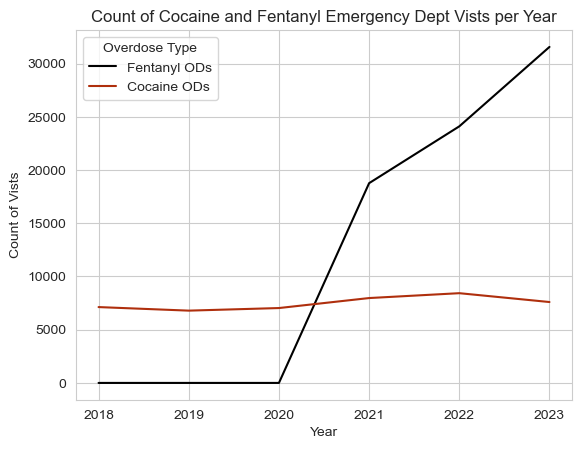

In [41]:
#set x-axis
annual_ED_visits= annual_ED_visits.set_index('year')
#set y-axis
annual_ED_visits.plot(y=['count_fentanyl','count_cocaine'])

plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Emergency Dept Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=10, fontsize=10)

plt.savefig('Emergency Vists per State.png')

## Count of overdoses by month

In [43]:
per_month = (
    er_hospital_states
    .loc[er_hospital_states['month']!='all']
    .groupby('month')[['count_cocaine','count_fentanyl']].sum().reset_index()
    
)

per_month

,month,count_cocaine,count_fentanyl
0,1,21359.0,14584.0
1,2,21045.0,14763.0
2,3,25730.0,17895.0
3,4,24303.0,17709.0
4,5,27199.0,19019.0
5,6,26365.0,19311.0
6,7,26932.0,20285.0
7,8,26571.0,20380.0
8,9,24580.0,19620.0
9,10,24160.0,22198.0


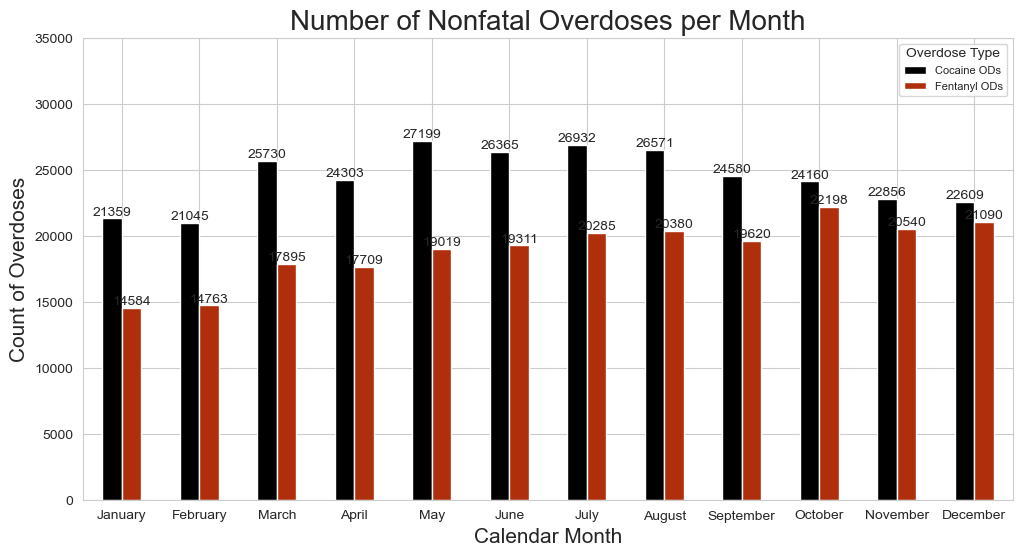

In [44]:
ax= per_month.plot(x='month', y= ['count_cocaine','count_fentanyl'], kind='bar', figsize=(12,6))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Calendar Month', fontsize=15)
plt.ylabel('Count of Overdoses', fontsize=15)
plt.title('Number of Nonfatal Overdoses per Month', fontsize=20)
plt.legend((['Cocaine ODs','Fentanyl ODs']), title='Overdose Type', title_fontsize=10, fontsize=8)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January','February','March','April','May','June','July','August','September','October','November','December'],rotation= 0)
plt.ylim(bottom=0, top=35000)

plt.savefig('ODs per month.png')

## Population analysis

In [46]:
coke_state_ods = er_hospital_states[
    (er_hospital_states['jurisdiction'] != 'US') &
    (er_hospital_states['month'] == 'all')
].copy()


In [47]:
fent_state_ods = er_hospital_states[
    (er_hospital_states['jurisdiction'] != 'US') &
    (er_hospital_states['month'] == 'all')
].copy()


In [48]:
cols_to_convert = [
    'population', 'count_cocaine'
]
for col in cols_to_convert:
    coke_state_ods[col] = pd.to_numeric(coke_state_ods[col], errors='coerce')
    


In [49]:
cols_to_convert2 = [
    'population', 'count_fentanyl'
]
for col in cols_to_convert:
    fent_state_ods[col] = pd.to_numeric(fent_state_ods[col], errors='coerce')
    


In [50]:
coke_state_ods = coke_state_ods.groupby(
    ['year', 'jurisdiction', 'population']
)['count_cocaine'].sum().reset_index()


In [51]:
OR = (
    coke_state_ods
    .loc[coke_state_ods['jurisdiction']== 'FL']
    ['population'].mean()
)
OR

21837539.333333332

In [52]:
fent_state_ods = fent_state_ods.groupby(
    ['year', 'jurisdiction', 'population']
)['count_fentanyl'].sum().reset_index()

In [53]:
coke_state_ods['cocaine_percent'] = (
    coke_state_ods['count_cocaine'] / coke_state_ods['population'] * 100
).round(2)

In [54]:
fent_state_ods['fentanyl_percent'] = (
    fent_state_ods['count_fentanyl'] / fent_state_ods['population'] * 100
).round(2)

In [55]:
collapsed = coke_state_ods.groupby('jurisdiction').agg({
    'year': list,
    'cocaine_percent': list
}).reset_index()

In [56]:
collapsed2 = fent_state_ods.groupby('jurisdiction').agg({
    'year': list,
    'fentanyl_percent': list
}).reset_index()

In [57]:
avg_cocaine_percent = coke_state_ods.groupby('jurisdiction')['cocaine_percent'].mean().reset_index()

In [58]:
avg_fentanyl_percent = fent_state_ods.groupby('jurisdiction')['fentanyl_percent'].mean().reset_index()

In [59]:
avg_cocaine_percent = avg_cocaine_percent.sort_values('cocaine_percent', ascending=False)

In [60]:
avg_fentanyl_percent = avg_fentanyl_percent.sort_values('fentanyl_percent', ascending=False)

In [61]:
avg_fentanyl_percent = avg_fentanyl_percent.rename(columns={'jurisdiction':'state'})

In [62]:
avg_cocaine_percent = avg_cocaine_percent.rename(columns={'jurisdiction':'state'})

In [63]:
avg_fentanyl_percent.head(5)

,state,fentanyl_percent
26,OR,0.018333
28,RI,0.018333
1,AZ,0.016667
17,MO,0.015000
20,NC,0.013333


In [163]:
avg_fentanyl_percent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 26 to 9
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             34 non-null     object 
 1   fentanyl_percent  34 non-null     float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


In [64]:
avg_cocaine_percent.head(5)

,state,cocaine_percent
20,NC,0.023333
4,DC,0.020000
24,NY,0.020000
13,LA,0.015000
6,FL,0.015000


# Age group analysis

In [67]:
age_range_df = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Overall by Sex & Age')
age_range_df

,jurisdiction,sex,age,month,year,time_frame,dataset,population,count_alldrug,count_opioid,...,count_methamphetamine,count_benzodiazepine,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,US,F,0-14,1,2018,monthly,ED,21721263,1754,49,...,NaN,56,8.1,0.2,NaN,0,0.3,suppressed,NaN,0.3
1,US,F,0-14,2,2018,monthly,ED,21721263,1652,53,...,NaN,61,7.6,0.2,NaN,suppressed,0.4,suppressed,NaN,0.3
2,US,F,0-14,3,2018,monthly,ED,21721263,1691,36,...,NaN,65,7.8,0.2,NaN,0,0.4,suppressed,NaN,0.3
3,US,F,0-14,4,2018,monthly,ED,21721263,1717,46,...,NaN,66,7.9,0.2,NaN,0,0.4,suppressed,NaN,0.3
4,US,F,0-14,5,2018,monthly,ED,21721263,1850,51,...,NaN,64,8.5,0.2,NaN,suppressed,0.3,suppressed,NaN,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,US,M,55+,9,2023,monthly,HOSP,38005604,2500,966,...,134,158,6.6,2.5,0.7,0.3,1.7,1.1,0.4,0.4
1556,US,M,55+,10,2023,monthly,HOSP,38005604,2524,978,...,114,148,6.6,2.6,0.7,0.3,1.7,1.2,0.3,0.4
1557,US,M,55+,11,2023,monthly,HOSP,38005604,2353,882,...,135,144,6.2,2.3,0.6,0.3,1.7,1.1,0.4,0.4
1558,US,M,55+,12,2023,monthly,HOSP,38005604,2370,844,...,126,148,6.2,2.2,0.6,0.3,1.7,1.1,0.3,0.4


In [68]:
age = (
    age_range_df
    .loc[age_range_df['month'] == 'all']
    [['sex', 'age', 'year','count_cocaine','count_fentanyl']]
)
age 

,sex,age,year,count_cocaine,count_fentanyl
12,F,0-14,2018,19,NaN
25,F,15-24,2018,372,NaN
38,F,25-34,2018,741,NaN
51,F,35-54,2018,973,NaN
64,F,55+,2018,344,NaN
...,...,...,...,...,...
1507,M,0-14,2023,81,226
1520,M,15-24,2023,416,1212
1533,M,25-34,2023,1748,3293
1546,M,35-54,2023,4827,4946


In [69]:
counts_by_age_group = (
    age
    .groupby('age')[['count_cocaine','count_fentanyl']].sum().reset_index()
)
counts_by_age_group=counts_by_age_group.rename(columns={'count_cocaine':'Cocaine ODs','count_fentanyl':'Fentanyl ODs'})
counts_by_age_group

,age,Cocaine ODs,Fentanyl ODs
0,0-14,1000,1465
1,15-24,9658,15551
2,25-34,27819,37416
3,35-54,61463,40811
4,55+,50340,15323


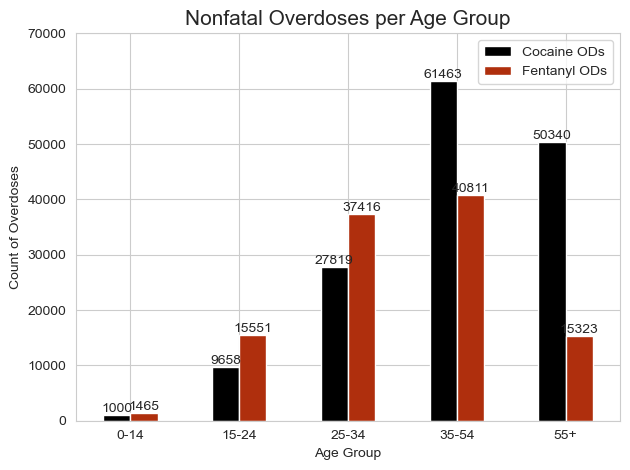

In [70]:
ax = counts_by_age_group.plot(x='age', y=['Cocaine ODs','Fentanyl ODs'], kind='bar')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation= 0)

plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Overdoses', fontsize=10)
plt.title('Nonfatal Overdoses per Age Group', fontsize=15)
plt.ylim(bottom=0, top=70000)
plt.tight_layout()
plt.savefig('age group ods.png')

## Female

In [72]:
female_age_group = (
    age
    .loc[age['sex'] == 'F']
    .groupby(['year','age'])[['count_cocaine','count_fentanyl']].sum()
)
female_age_group = female_age_group.rename(columns={'count_cocaine':'Cocaine ODs','count_fentanyl':'Fentanyl ODs'})
female_age_group

Cocaine ODs Fentanyl ODs
year age                           
2018 0-14           43            0
     15-24         697            0
     25-34        1757            0
     35-54        3679            0
     55+          2269            0
2019 0-14           61            0
     15-24         608            0
     25-34        1598            0
     35-54        3912            0
     55+          2680            0
2020 0-14           66            0
     15-24         683            0
     25-34        1586            0
     35-54        3408            0
     55+          2403            0
2021 0-14           91          136
     15-24         568         1323
     25-34        1601         2653
     35-54        3560         2533
     55+          2733         1052
2022 0-14          111          206
     15-24         615         1705
     25-34        1641         3487
     35-54        3502         3657
     55+          2995         1499
2023 0-14          105          318
     15-24         541         2164
     25-34        1578         4522
     35-54        3589         5639
     55+          3090         2281

In [ ]:
female_age_group = 

AttributeError: 'NoneType' object has no attribute 'axes'

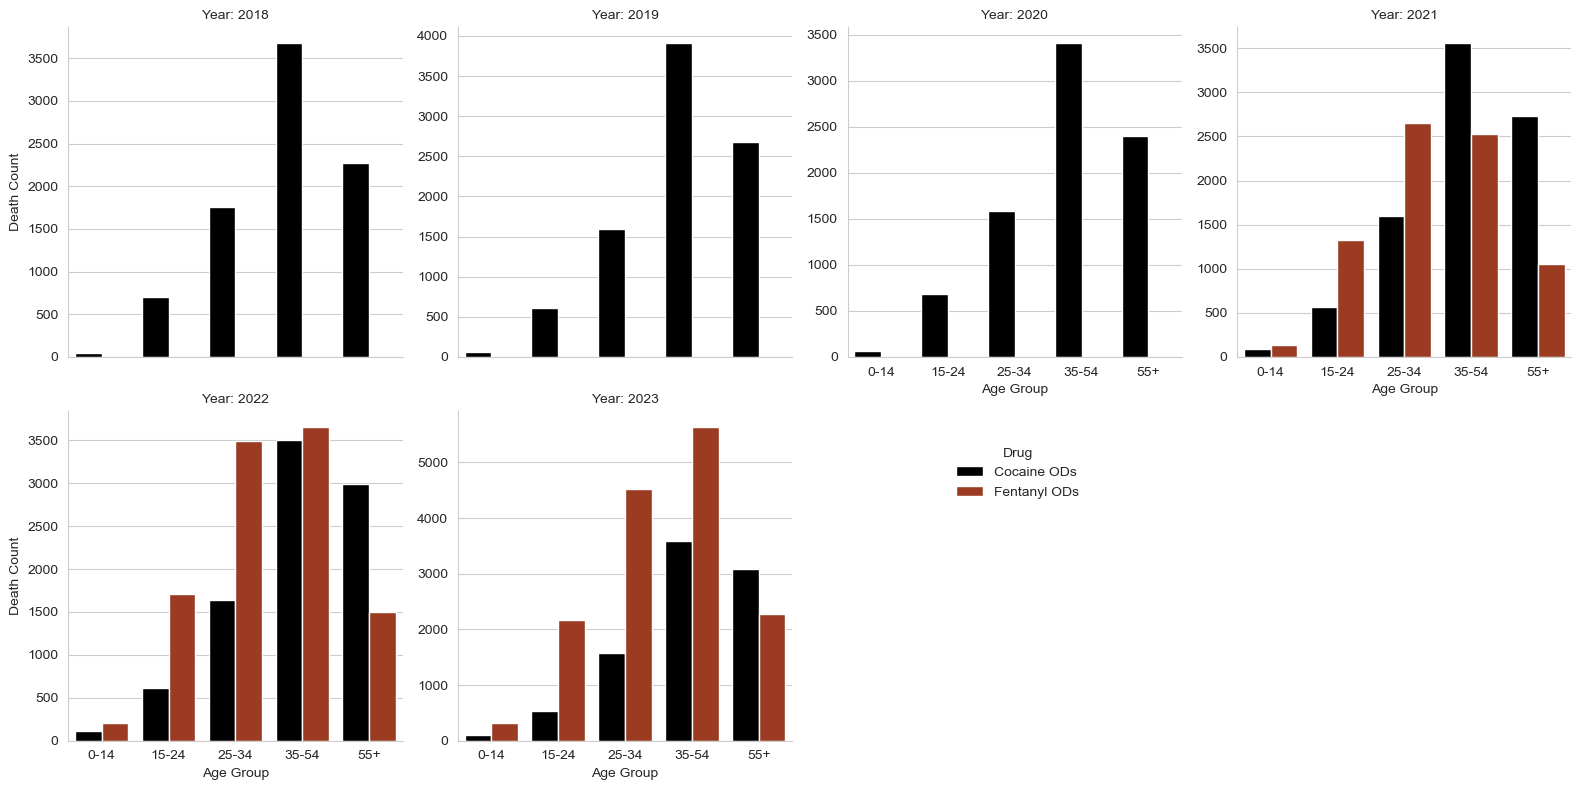

In [73]:
df_reset = female_age_group.reset_index()
df_melted = df_reset.melt(id_vars=['year', 'age'],
                          value_vars=['Cocaine ODs', 'Fentanyl ODs'],
                          var_name='drug', value_name='count')
g = sns.FacetGrid(df_melted, col='year', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='age', y='count', hue='drug', order=sorted(df_melted['age'].unique()), palette=colors)
g.set_titles("Year: {col_name}")
g.set_axis_labels("Age Group", "Death Count")
g.add_legend(title='Drug')
g = sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45))

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
g.savefig('female age group ods.png')

## Male

In [89]:
male_age_group = (
    age
    .loc[age['sex'] == 'M']
    .groupby(['year','age'])[['count_cocaine','count_fentanyl']].sum()
)
male_age_group= male_age_group.rename(columns={'count_cocaine':'Cocaine ODs','count_fentanyl':'Fentanyl ODs'})
male_age_group

Cocaine ODs Fentanyl ODs
year age                           
2018 0-14           68            0
     15-24        1198            0
     25-34        3164            0
     35-54        6547            0
     55+          4981            0
2019 0-14           50            0
     15-24        1092            0
     25-34        2838            0
     35-54        6541            0
     55+          5396            0
2020 0-14           64            0
     15-24        1022            0
     25-34        2967            0
     35-54        6176            0
     55+          5276            0
2021 0-14          103          172
     15-24         958         2851
     25-34        3064         6848
     35-54        6778         6500
     55+          5906         2115
2022 0-14           99          260
     15-24         871         3450
     25-34        3034         8571
     35-54        6842         9076
     55+          6049         3124
2023 0-14          139          373
     15-24         805         4058
     25-34        2991        11335
     35-54        6929        13406
     55+          6562         5252

AttributeError: 'NoneType' object has no attribute 'axes'

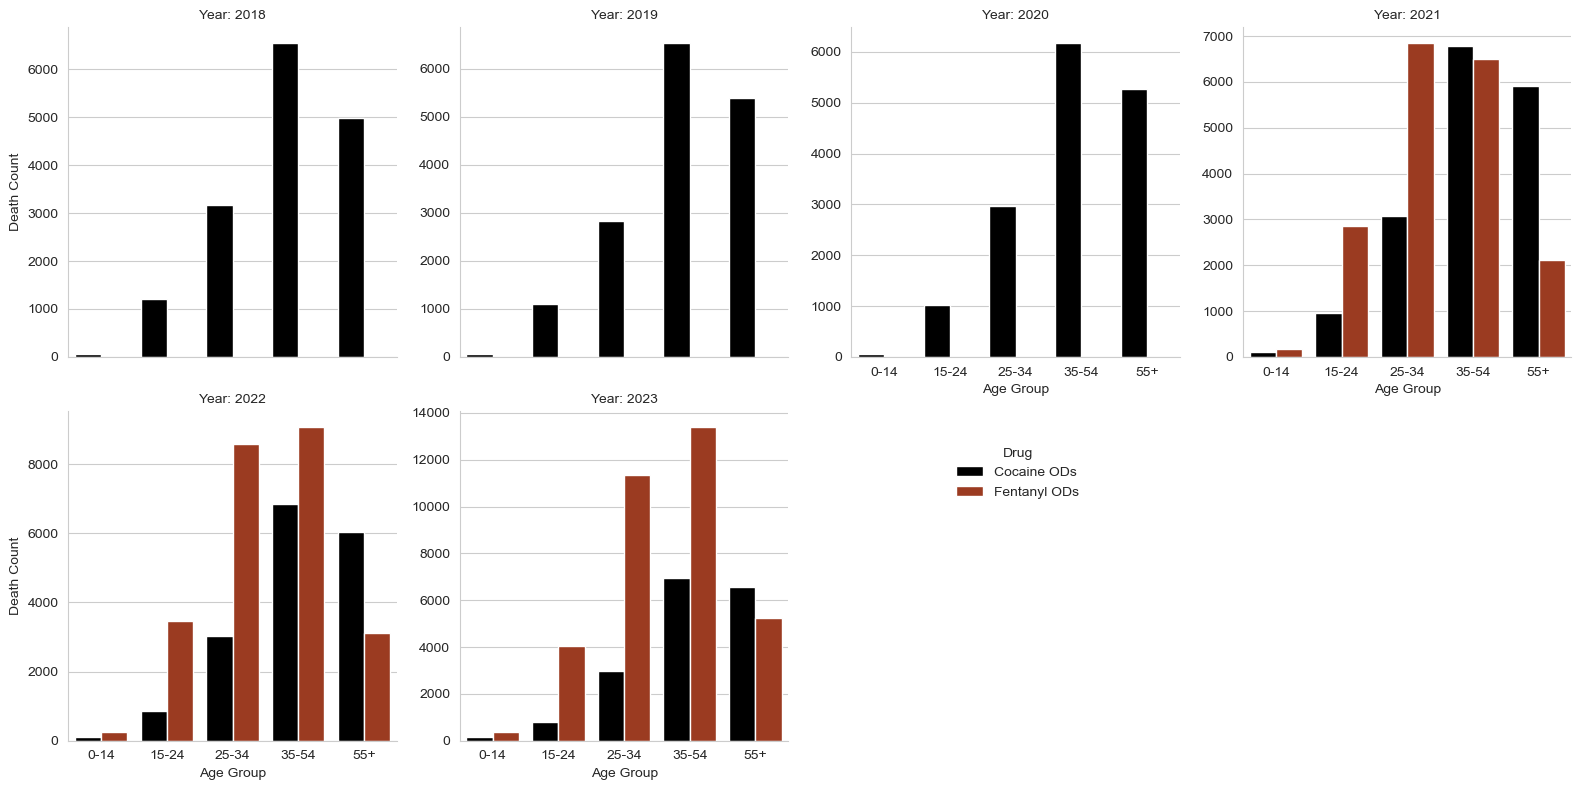

In [91]:
df_reset = male_age_group.reset_index()
df_melted = df_reset.melt(id_vars=['year', 'age'],
                          value_vars=['Cocaine ODs', 'Fentanyl ODs'],
                          var_name='drug', value_name='count')
g = sns.FacetGrid(df_melted, col='year', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='age', y='count', hue='drug', order=sorted(df_melted['age'].unique()), palette=colors)
g.set_titles("Year: {col_name}")
g.set_axis_labels("Age Group", "Death Count")
g.add_legend(title='Drug')
g = sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45))
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
plt.tight_layout()
plt.show()
g.savefig('male age group ods.jpg')

# Overdose Death Analysis

In [93]:
filepath = '../data/VSRR_Provisional_Drug_Overdose_Death_Counts.csv'
od_deaths_df = pd.read_csv(filepath)
od_deaths_df

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Percent with drugs specified,88.0952381,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Deaths,"4,133",100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70324,YC,2024,September,12 month-ending,Cocaine (T40.5),"1,321",100.0,0.567389,New York City,Underreported due to incomplete data.,*,"1,388"
70325,YC,2024,September,12 month-ending,Psychostimulants with abuse potential (T43.6),227,100.0,0.567389,New York City,Underreported due to incomplete data.,*,237
70326,YC,2024,September,12 month-ending,Heroin (T40.1),444,100.0,0.567389,New York City,Underreported due to incomplete data.,*,459
70327,YC,2024,September,12 month-ending,Number of Drug Overdose Deaths,"2,451",100.0,0.567389,New York City,Underreported due to incomplete data.,*,"2,552"


In [95]:
deaths_fent_coke = (
    od_deaths_df
    .loc[(od_deaths_df['Indicator']=='Synthetic opioids, excl. methadone (T40.4)') | (od_deaths_df['Indicator']=='Cocaine (T40.5)')]
)
deaths_fent_coke

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
13,AK,2015,August,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
17,AK,2015,August,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
26,AK,2015,December,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70304,YC,2024,November,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,1.194127,New York City,Underreported due to incomplete data. Data no...,*,"1,664"
70311,YC,2024,October,12 month-ending,Cocaine (T40.5),"1,234",100.0,0.781068,New York City,Underreported due to incomplete data.,*,"1,314"
70315,YC,2024,October,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)","1,678",100.0,0.781068,New York City,Underreported due to incomplete data.,*,"1,770"
70324,YC,2024,September,12 month-ending,Cocaine (T40.5),"1,321",100.0,0.567389,New York City,Underreported due to incomplete data.,*,"1,388"


In [97]:
deaths_fent_coke['Data Value'] = pd.to_numeric(deaths_fent_coke['Data Value'], errors = 'coerce')

C:\Users\rinad\AppData\Local\Temp\ipykernel_10392\844080778.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
years2018_2023 = (
    deaths_fent_coke
    .loc[(deaths_fent_coke['Year'] >= 2018) & (deaths_fent_coke['Year'] <= 2023)]
)
years2018_2023.head(5)

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
434,AK,2018,April,12 month-ending,Cocaine (T40.5),15.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,16
441,AK,2018,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",38.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,39
444,AK,2018,August,12 month-ending,Cocaine (T40.5),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
455,AK,2018,August,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",19.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,20
456,AK,2018,December,12 month-ending,Cocaine (T40.5),10.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,11


In [101]:
coke_per_state = (
    years2018_2023
    .loc[years2018_2023['Indicator'] == 'Cocaine (T40.5)']
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby('State Name')['Data Value'].sum().reset_index()
    .sort_values(by='Data Value',ascending=False)
)

top10statecokeod=coke_per_state.head(5)
top10statecokeod

,State Name,Data Value
18,Maryland,49946.0
42,Virginia,42334.0
38,Tennessee,36361.0
27,New Jersey,34696.0
29,New York,34221.0


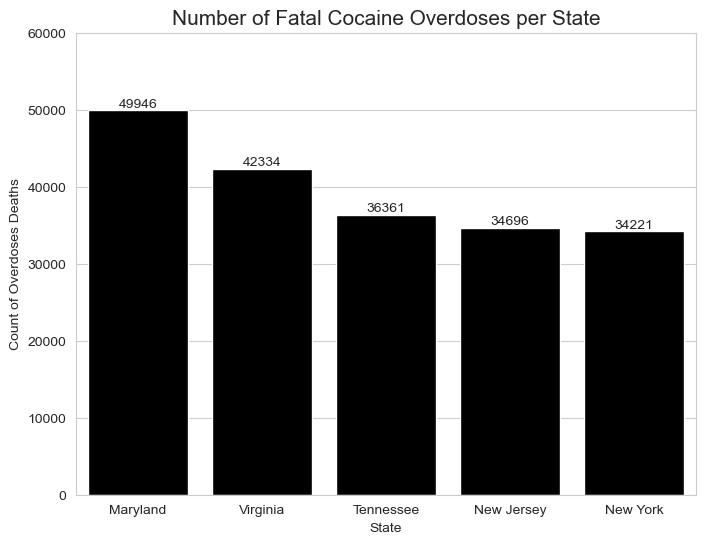

In [103]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='State Name', y='Data Value', data= top10statecokeod)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Overdoses Deaths', fontsize=10)
plt.title('Number of Fatal Cocaine Overdoses per State', fontsize=15)
#plt.legend(title='Overdose Type', title_fontsize=10, fontsize=8)
plt.xticks(rotation=0)
plt.ylim(bottom=0, top=60000)

plt.savefig('fatal coke ods.png')

In [105]:
fent_per_state = (
    years2018_2023
    .loc[years2018_2023['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)']
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby('State Name')['Data Value'].sum().reset_index()
    .sort_values(by='Data Value',ascending=False)
)
top10statefentod= fent_per_state.head(5)

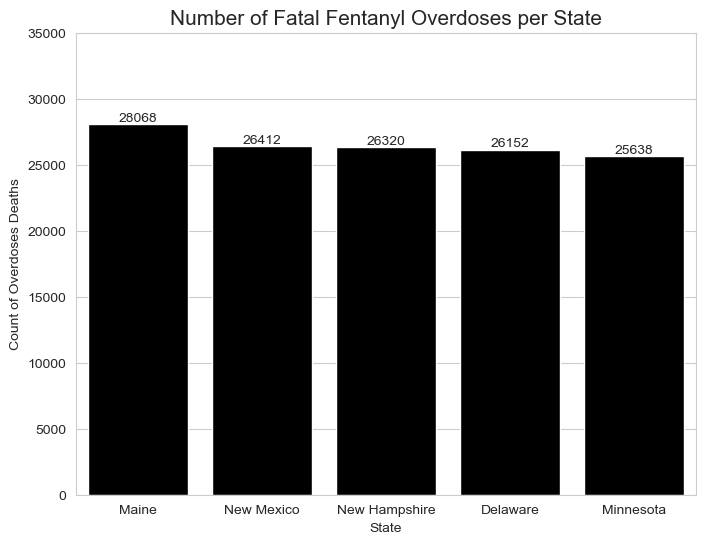

In [107]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='State Name', y='Data Value', data= top10statefentod )

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.xlabel('State', fontsize=10)
plt.ylabel('Count of Overdoses Deaths', fontsize=10)
plt.title('Number of Fatal Fentanyl Overdoses per State', fontsize=15)
#plt.legend(('Fentanyl Deaths'), title='Overdose Type', title_fontsize=10, fontsize=8)
plt.xticks(rotation=0)
plt.ylim(bottom=0, top=35000)
plt.savefig('fatal fent ods.png')

In [109]:
deaths_per_year= (
    years2018_2023
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby(['Year','Indicator'])['Data Value'].sum().reset_index()
)
deaths_per_year.sort_values(by='Data Value', ascending = False)

,Year,Indicator,Data Value
4,2020,Cocaine (T40.5),136386.0
3,2019,"Synthetic opioids, excl. methadone (T40.4)",129871.0
2,2019,Cocaine (T40.5),126207.0
6,2021,Cocaine (T40.5),117183.0
10,2023,Cocaine (T40.5),113620.0
8,2022,Cocaine (T40.5),112894.0
1,2018,"Synthetic opioids, excl. methadone (T40.4)",103731.0
9,2022,"Synthetic opioids, excl. methadone (T40.4)",103469.0
0,2018,Cocaine (T40.5),99170.0
5,2020,"Synthetic opioids, excl. methadone (T40.4)",94668.0


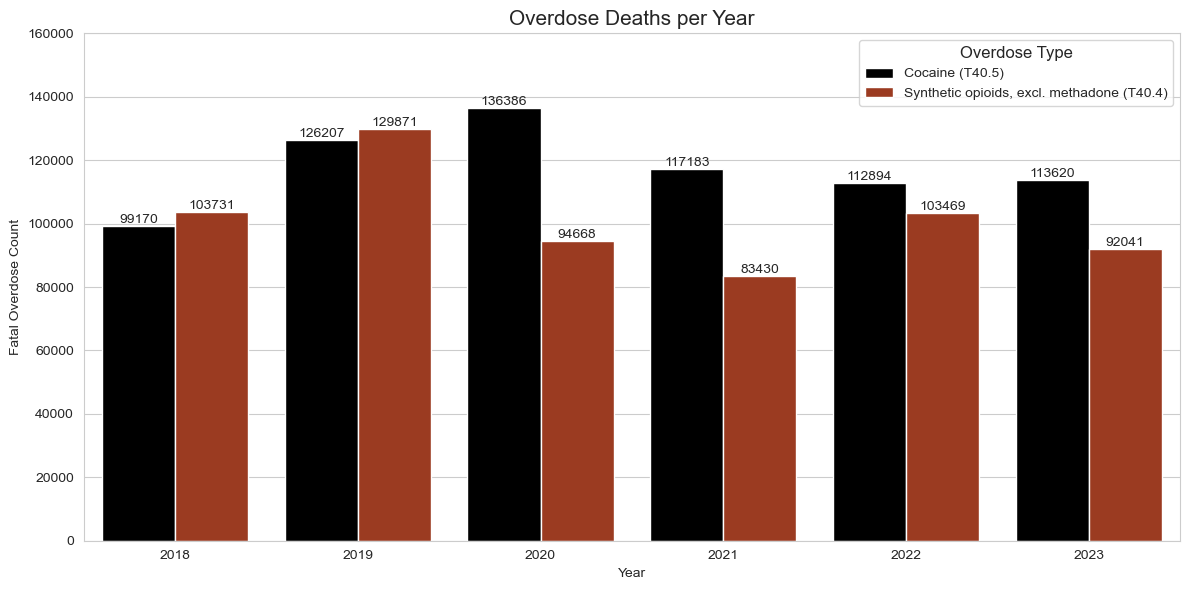

In [111]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Year', y='Data Value',hue='Indicator', data= deaths_per_year)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Overdose Deaths per Year', fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Fatal Overdose Count',fontsize=10)
plt.legend(title='Overdose Type', title_fontsize=12, fontsize=10)
plt.tight_layout()

plt.ylim(bottom=0, top=160000)
plt.savefig('fatal per year ods.png')

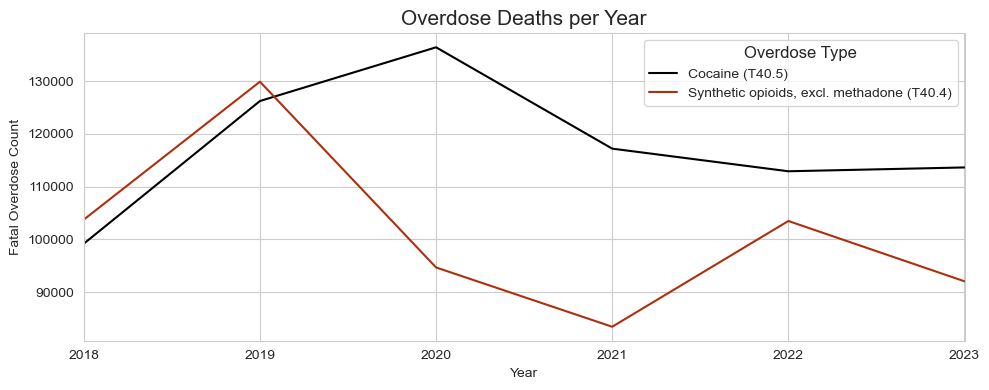

In [129]:
#set x-axis
#annual_HOSP_visits= annual_HOSP_visits.set_index('year')
#set y-axis
#annual_HOSP_visits.plot(y=['count_fentanyl','count_cocaine'])


#plt.xlabel('Year')
#plt.ylabel('Count of Vists')
#plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
#plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)

#plt.savefig('Inpatient Vists per State.png')
plt.figure(figsize=(10,4))
ax = sns.lineplot(x='Year', y='Data Value', hue= 'Indicator', data= deaths_per_year)

plt.title('Overdose Deaths per Year', fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Fatal Overdose Count',fontsize=10)
plt.legend(title='Overdose Type', title_fontsize=12, fontsize=10)
plt.xlim(2018, 2023)
plt.tight_layout()

plt.savefig('fatal per year ods line.png')

In [ ]:
deaths_per_month= (
    years2018_2023
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby(['Month','Indicator'])['Data Value'].sum().reset_index()
)
deaths_per_month.sort_values(by='Data Value', ascending = False)

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month', y='Data Value',hue='Indicator', data= deaths_per_month)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Overdose Deaths per Month', fontsize=15)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Fatal Overdose Count',fontsize=10)
plt.legend(title='Overdose Type', title_fontsize=12, fontsize=10)
plt.tight_layout()

plt.ylim(bottom=0, top=75000)
plt.savefig('fatal per month ods.png')